In [434]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import data_cleaner as dc
import data_modeler as dm
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
import importlib
importlib.reload(dm)
importlib.reload(dc)
%matplotlib inline

In [429]:
df = dm.load_dataframe()
df

,year,pct,cmplnts,population,arrests,stops,stop_arrests,policy,nonstop_arrests,crimerate,nonstop_arrestrate,stoprate,stop_arrestrate,arrestrate,normal_year
2,2008.0,1.0,6614.0,66679.0,5008.0,2506.0,221.0,1,4787.0,99.191650,71.791719,37.583047,3.314387,75.106105,1.0
3,2009.0,1.0,6280.0,66679.0,5371.0,2585.0,238.0,1,5133.0,94.182576,76.980759,38.767828,3.569340,80.550098,2.0
4,2010.0,1.0,5895.0,66679.0,4950.0,2446.0,260.0,1,4690.0,88.408644,70.336988,36.683214,3.899279,74.236266,3.0
5,2011.0,1.0,5955.0,66679.0,5583.0,3626.0,215.0,1,5368.0,89.308478,80.505107,54.379940,3.224403,83.729510,4.0
6,2012.0,1.0,6287.0,66679.0,5479.0,3053.0,189.0,1,5290.0,94.287557,79.335323,45.786529,2.834476,82.169799,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2014.0,123.0,2859.0,98032.0,1555.0,321.0,70.0,0,1485.0,29.163946,15.148115,3.274441,0.714053,15.862167,7.0
984,2015.0,123.0,2732.0,98032.0,1439.0,127.0,30.0,0,1409.0,27.868451,14.372858,1.295495,0.306023,14.678880,8.0
985,2016.0,123.0,2648.0,98032.0,1568.0,90.0,32.0,0,1536.0,27.011588,15.668353,0.918068,0.326424,15.994777,9.0
986,2017.0,123.0,2549.0,98032.0,1602.0,62.0,23.0,0,1579.0,26.001714,16.106985,0.632447,0.234617,16.341603,10.0


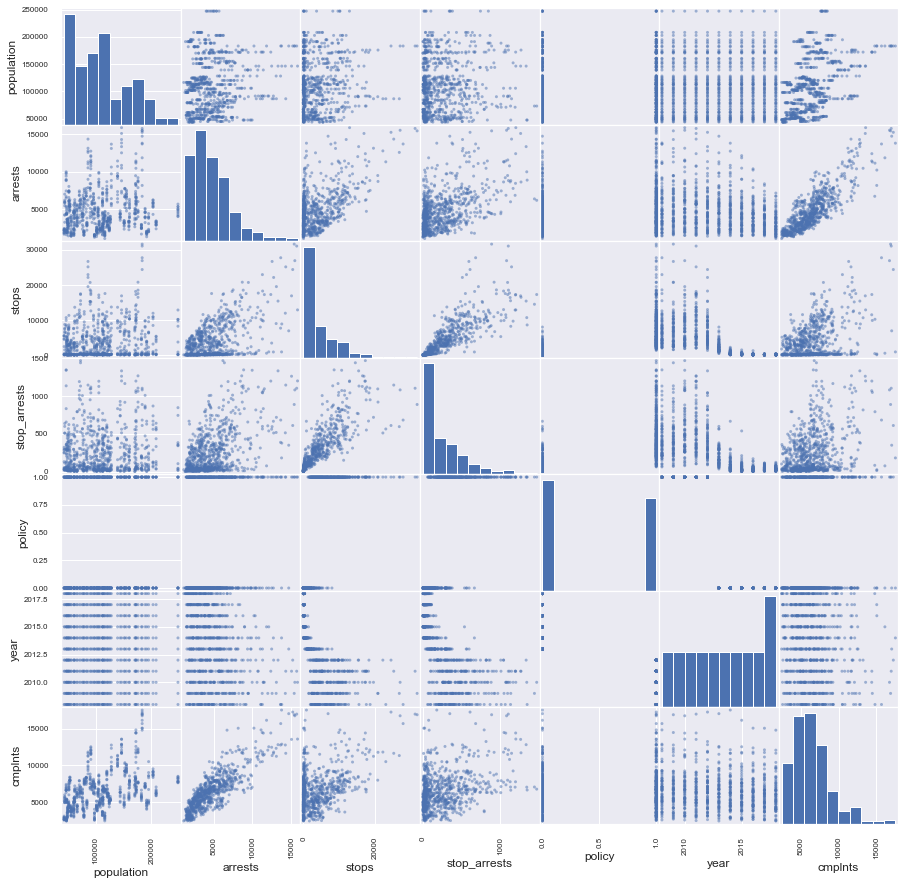

In [427]:
sns.set(rc={'figure.figsize':(15,15)})
pd.plotting.scatter_matrix(df[['population','arrests','stops','stop_arrests','policy','year','cmplnts']]);


As we can see, there is extremely high correlation between complaints and arrests, and there is a very high correlation between stops and stop arrests. Other data is well correlated as well.

## Basic linear model

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

<module 'data_modeler' from '/Users/brad/Documents/Scripts/flatiron/fis-mod4-project/data_modeler.py'>

Look at base features:

In [463]:
x_vars = ['population', 'cmplnts', 'stops', 'stop_arrests', 'policy', 'normal_year']
results = dm.run_ols(df, x_vars, 'nonstop_arrests')
results['result'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        nonstop_arrests   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     594.7
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          8.96e-259
Time:                        21:24:24   Log-Likelihood:                -5423.4
No. Observations:                 651   AIC:                         1.086e+04
Df Residuals:                     644   BIC:                         1.089e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1436.8301    252.403      5.693      0.000     941.198    1932.462
population      -0.0148      0.001    -16.008      0.000      -0.017      -0.013
cmplnts          0.8820      0.021     42.752      0.000       0.841       0.922
stops            0.1019      0.016      6.293      0.000       0.070       0.134
stop_arrests     0.5528      0.265      2.086      0.037       0.032       1.073
policy       -1489.4908    180.136     -8.269      0.000   -1843.215   -1135.766
normal_year   -147.1428     25.481     -5.775      0.000    -197.179     -97.107
==============================================================================
Omnibus:                       46.494   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.133
Skew:                           0.566   Prob(JB):                     7.19e-15
Kurtosis:                       4.059   Cond. No.                     8.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [461]:
x_vars = ['stoprate','stop_arrestrate','crimerate','policy','normal_year','population']
dm.run_ols(df, x_vars, 'nonstop_arrestrate')['result'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     nonstop_arrestrate   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     639.3
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          2.22e-267
Time:                        21:24:13   Log-Likelihood:                -2549.9
No. Observations:                 651   AIC:                             5114.
Df Residuals:                     644   BIC:                             5145.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2464      3.659     -0.341      0.733      -8.432       5.939
stoprate            0.0943      0.020      4.695      0.000       0.055       0.134
stop_arrestrate     0.7567      0.275      2.747      0.006       0.216       1.298
crimerate           0.8953      0.022     39.899      0.000       0.851       0.939
policy            -15.7146      2.154     -7.295      0.000     -19.945     -11.485
normal_year        -1.5881      0.306     -5.194      0.000      -2.189      -0.988
population       3.844e-06   1.21e-05      0.318      0.751   -1.99e-05    2.76e-05
==============================================================================
Omnibus:                      141.140   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.988
Skew:                           0.868   Prob(JB):                    7.48e-157
Kurtosis:                       7.847   Cond. No.                     1.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [475]:
x_vars = ['crimerate','stop_arrestrate','stoprate','policy']
results = dm.run_ols(df, x_vars, 'nonstop_arrestrate')
results['result'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     nonstop_arrestrate   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     932.3
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          1.25e-266
Time:                        21:25:32   Log-Likelihood:                -2557.2
No. Observations:                 651   AIC:                             5124.
Df Residuals:                     646   BIC:                             5147.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -14.6473      1.371    -10.681      0.000     -17.340     -11.955
crimerate           0.8986      0.020     44.927      0.000       0.859       0.938
stop_arrestrate     1.0518      0.268      3.932      0.000       0.526       1.577
stoprate            0.0837      0.020      4.275      0.000       0.045       0.122
policy             -7.1976      1.447     -4.976      0.000     -10.038      -4.357
==============================================================================
Omnibus:                      117.816   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              507.453
Skew:                           0.755   Prob(JB):                    6.43e-111
Kurtosis:                       7.053   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [476]:
x_vars = ['crimerate']
results = dm.run_ols(df, x_vars, 'nonstop_arrestrate')
results['result'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     nonstop_arrestrate   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     2940.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          3.42e-243
Time:                        21:25:55   Log-Likelihood:                -2614.4
No. Observations:                 651   AIC:                             5233.
Df Residuals:                     649   BIC:                             5242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.9986      1.318    -13.651      0.000     -20.588     -15.410
crimerate      0.9990      0.018     54.219      0.000       0.963       1.035
==============================================================================
Omnibus:                      103.805   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              610.373
Skew:                           0.548   Prob(JB):                    2.88e-133
Kurtosis:                       7.615   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [477]:
X_train = results['data']['X_train'].copy()
X_test = results['data']['X_test'].copy()
y_train = results['data']['y_train']
y_test = results['data']['y_test']
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 180.20510497247346
Test Mean Squared Error: 171.93229462045332


In [478]:
linreg.intercept_, linreg.coef_[0], linreg.score(X_train,y_train), linreg.score(X_test, y_test)

(-17.99862563925766,
 0.9990239321575255,
 0.8191554988707092,
 0.8402974137851519)

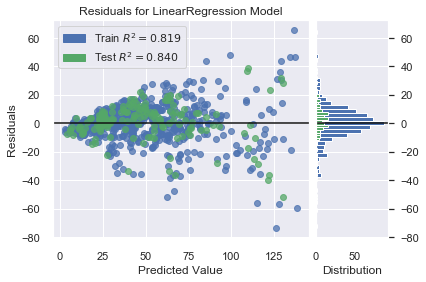

In [479]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [483]:
x_vars = ['crimerate','stoprate','policy','normal_year','stop_arrestrate']
results = dm.run_ols(df, x_vars, 'nonstop_arrestrate')
X_train = results['data']['X_train'].copy()
X_test = results['data']['X_test'].copy()
y_train = results['data']['y_train']
y_test = results['data']['y_test']
results['result'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     nonstop_arrestrate   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     768.8
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          6.43e-269
Time:                        21:27:56   Log-Likelihood:                -2555.9
No. Observations:                 651   AIC:                             5124.
Df Residuals:                     645   BIC:                             5151.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2090      2.953     -0.748      0.455      -8.008       3.590
crimerate           0.9328      0.021     45.093      0.000       0.892       0.973
stoprate            0.0657      0.021      3.201      0.001       0.025       0.106
policy            -15.1156      2.161     -6.996      0.000     -19.358     -10.873
normal_year        -1.6554      0.310     -5.348      0.000      -2.263      -1.048
stop_arrestrate     1.1238      0.274      4.104      0.000       0.586       1.662
==============================================================================
Omnibus:                      113.507   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.288
Skew:                           0.703   Prob(JB):                    3.86e-114
Kurtosis:                       7.157   Cond. No.                         646.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [484]:
from sklearn import metrics

def run_model(model, X_train, X_test, y_train, y_test):
    
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

rfe = RFECV(LinearRegression(), cv=5)
X_rfe_train = rfe.fit_transform(X_train, y_train)
X_rfe_test = rfe.transform(X_test)
lm = LinearRegression().fit(X_rfe_train, y_train)
run_model(lm, X_rfe_train, X_rfe_test, y_train, y_test)
print ('The optimal number of features is: ', rfe.n_features_)
print(X_train.columns)
rfe.ranking_

Training R^2 : 0.8563126238598512
Training Root Mean Square Error 12.270601829955991

----------------

Testing R^2 : 0.8245053724545485
Testing Root Mean Square Error 12.340709377733987
The optimal number of features is:  5
Index(['crimerate', 'stoprate', 'policy', 'normal_year', 'stop_arrestrate'], dtype='object')


array([1, 1, 1, 1, 1])

## VIF


In [382]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [485]:
x_vars = ['crimerate','stoprate','stop_arrestrate','policy','normal_year','population']
results = dm.run_ols(df, x_vars, 'nonstop_arrestrate')
X_train = results['data']['X_train'].copy()
X_test = results['data']['X_test'].copy()
y_train = results['data']['y_train']
y_test = results['data']['y_test']

vif = [variance_inflation_factor(X_train.values, i) for i in range(1, X_train.shape[1])]
print(X_train.columns.to_list())
list(vif)

['crimerate', 'stoprate', 'stop_arrestrate', 'policy', 'normal_year', 'population']


[7.398169674150347,
 6.5034694507004005,
 5.363468202158467,
 8.69761360466083,
 6.091388533595566]

One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

## PCA to reduce multicollinearity

In [303]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [486]:
x_vars = ['crimerate','stoprate','stop_arrestrate','policy','normal_year','population']
results = dm.run_ols(df, x_vars, 'nonstop_arrestrate')
X_train = results['data']['X_train'].copy()
X_test = results['data']['X_test'].copy()
y_train = results['data']['y_train']
y_test = results['data']['y_test']
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [491]:
pca = PCA(.98)
pca.fit(X_train)
pca.n_components_

6

In [492]:
pca.components_

array([[ 0.27869043,  0.50087786,  0.48922122,  0.45434005, -0.43962035,
        -0.18006853],
       [-0.59113036,  0.01008847, -0.07114609,  0.34953672, -0.34220512,
         0.6372763 ],
       [ 0.28237315,  0.34755514,  0.34856087, -0.29188876,  0.3890905 ,
         0.66436864],
       [-0.69322551,  0.2527014 ,  0.44944639, -0.13110228,  0.35094548,
        -0.33649339],
       [ 0.00530822, -0.58020382,  0.5938962 , -0.37294347, -0.40898048,
         0.06535131],
       [-0.11212561,  0.47721122, -0.2817648 , -0.65568705, -0.49780561,
        -0.05069476]])

In [493]:
pca.explained_variance_ratio_.sum()

1.0

In [494]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [495]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 146.98431861464317
Test Mean Squared Error: 164.17686867500828


In [496]:
linreg.intercept_, linreg.coef_[0], linreg.score(X_train,y_train), linreg.score(X_test, y_test)

(47.14492354393704, 9.202504666144641, 0.8524740627596316, 0.8467344454359125)

Text(0.5, 1.0, 'Linear Regression')

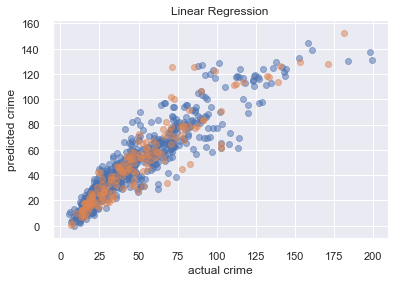

In [497]:
plt.scatter(y_train, linreg.predict(X_train), alpha=0.5)
plt.scatter(y_test, linreg.predict(X_test), alpha=0.5)
plt.xlabel('actual crime')
plt.ylabel('predicted crime')
plt.title('Linear Regression')

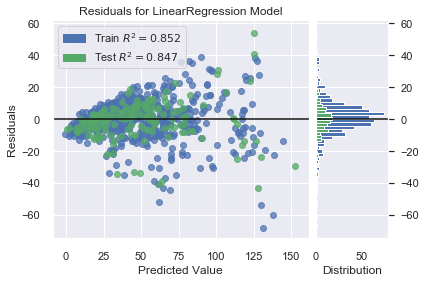

In [498]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Cross validation

In [ ]:
https://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html

## Try interaction terms

In [26]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(X)
clf = linear_model.LinearRegression()
clf.fit(X, y)

,year,pct,cmplnts,population,arrests,stops,stop_arrests
2,2008.0,1.0,6614.0,66679.0,5008.0,2506.0,221.0
3,2009.0,1.0,6280.0,66679.0,5371.0,2585.0,238.0
4,2010.0,1.0,5895.0,66679.0,4950.0,2446.0,260.0
5,2011.0,1.0,5955.0,66679.0,5583.0,3626.0,215.0
6,2012.0,1.0,6287.0,66679.0,5479.0,3053.0,189.0
...,...,...,...,...,...,...,...
983,2014.0,123.0,2859.0,98032.0,1555.0,321.0,70.0
984,2015.0,123.0,2732.0,98032.0,1439.0,127.0,30.0
985,2016.0,123.0,2648.0,98032.0,1568.0,90.0,32.0
986,2017.0,123.0,2549.0,98032.0,1602.0,62.0,23.0
